# **STUDENT PERFORMANCE CODING**

Libraries Used

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

loading the dataset


In [ ]:
# Reading CSV file containing Student Performance data and storing it in DataFrame.
df = pd.read_csv("Student_Performance[1].csv")

DataFrame

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
# Accesing DataFrame columns
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
# Count of Missing values of every column in the dataset
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

There are No Null values

In [ ]:
# Value Count for Extracurricular Activities
df["Extracurricular Activities"].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [ ]:
# Value count for Hours Studied
df["Hours Studied"].value_counts()

Hours Studied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64

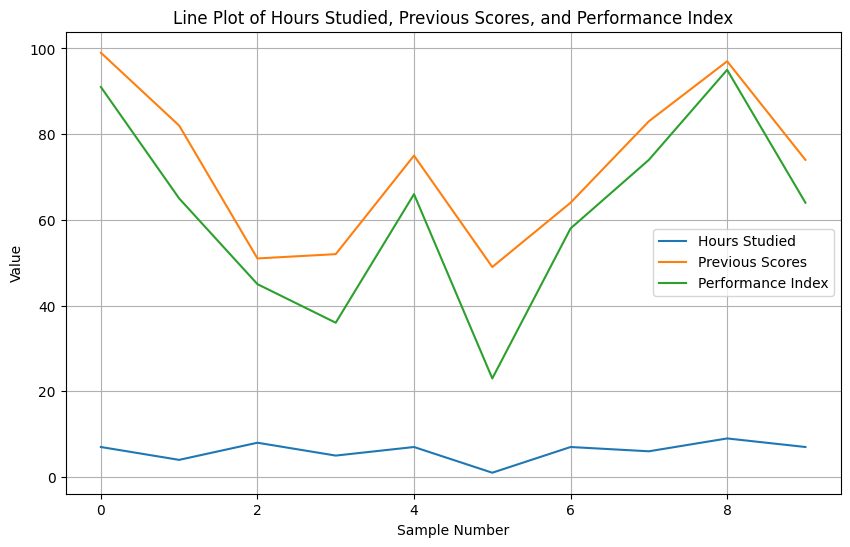

In [ ]:
# Line Plot comparison between Hours studied,Previous Scores and Performance Index
hours_studied = [7, 4, 8, 5, 7, 1, 7, 6, 9, 7]  # Example data for 'Hours Studied'
previous_scores = [99, 82, 51, 52, 75, 49, 64, 83, 97, 74]  # Example data for 'Previous Scores'
performance_index = [91.0, 65.0, 45.0, 36.0, 66.0, 23.0, 58.0, 74.0, 95.0, 64.0]  # Example data for 'Performance Index'

plt.figure(figsize=(10, 6))
plt.plot(hours_studied, label='Hours Studied')
plt.plot(previous_scores, label='Previous Scores')
plt.plot(performance_index, label='Performance Index')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.title('Line Plot of Hours Studied, Previous Scores, and Performance Index')
plt.legend()
plt.grid(True)
plt.show()


We see that, as Hours studied increase, Performance Index generally tends to go up too.
Previous scores also fluctuate, but they don't seem to have as clear a pattern.

In [ ]:
# Average Performance Index for Hours Studied between 6 and 9
df[(df['Hours Studied']>=6) & (df['Hours Studied']<=9)]['Performance Index'].mean()

62.131019036954086


The average performance index for students who studied between 6 and 9 hours is approximately 62.13


In [ ]:
# Calculating descriptive statistics
descriptive_stats = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].describe()

# Print the descriptive statistics
print(descriptive_stats)

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

The average hours studied is approximately 4.99 between range 1 to 9.    

The average previous score is around 69.45 between scores range from 40 to 99.

On average, students sleep about 6.53 hours per night between the range is from 4 to 9 hours.

The average number of sample question papers practiced is approximately 4.58 between range is from 0 to 9 papers.

The average performance index is around 55.22 between index ranges from 10 to 100.

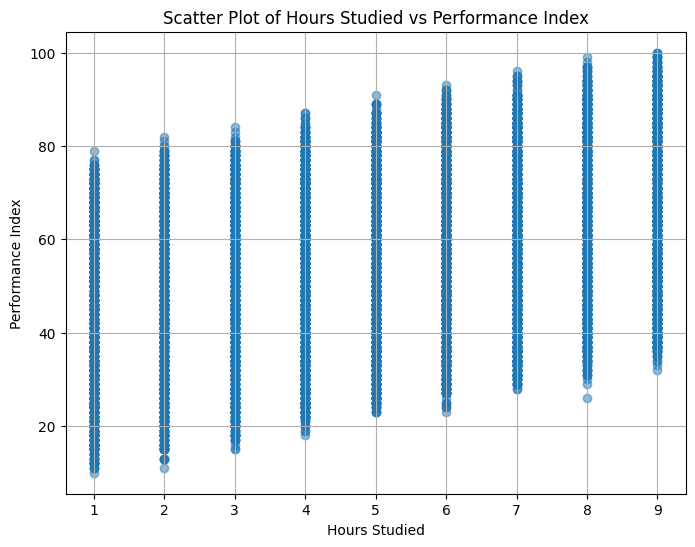

In [ ]:
# Scatter plot of 'Hours Studied' vs 'Performance Index'
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours Studied'], df['Performance Index'], alpha=0.5)
plt.title('Scatter Plot of Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

 There is a tendency for higher performance as the number of hours studied increases. However, this relationship is not entirely straightforward, as there are instances of low performance even with higher hours studied, and vice versa.

In [ ]:
# With Extracurricular Activities the total sum of hours studied for students are 24755 and without 25174
# the EA is not contributing negatevly to the hours students studied
df.groupby('Extracurricular Activities')['Hours Studied'].sum()

Extracurricular Activities
No     25174
Yes    24755
Name: Hours Studied, dtype: int64

In [ ]:
# Total Hours Studied for Each Performance Index Level.
pd.DataFrame(df.groupby('Performance Index')['Hours Studied'].sum().reset_index().sort_values('Performance Index',ascending=False))


,Performance Index,Hours Studied
90,100.0,27
89,99.0,53
88,98.0,62
87,97.0,112
86,96.0,120
...,...,...
4,14.0,7
3,13.0,18
2,12.0,8
1,11.0,6


Students who achieved higher performance indices like 99, and 98 have
spent more time studying. This indicates a likely positive relationship between Hours Studied and Performance index

The data spans across 91 performance index levels, showcasing a diverse range between Hours studied and performance Index.

In [ ]:
# Calculateing frequencies of each category
extracurricular_counts = df['Extracurricular Activities'].value_counts()

# Calculating proportions of extracurricular Activities
extracurricular_proportions = extracurricular_counts / len(df)
# Print frequencies and proportions
print("Frequency of each category:")
print(extracurricular_counts)
print("\nProportion of each category:")
print(extracurricular_proportions)


Frequency of each category:
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

Proportion of each category:
Extracurricular Activities
No     0.5052
Yes    0.4948
Name: count, dtype: float64


 5052 instances where students did not participate in extracurricular activities.

 4948 instances where students did participate in extracurricular activities.

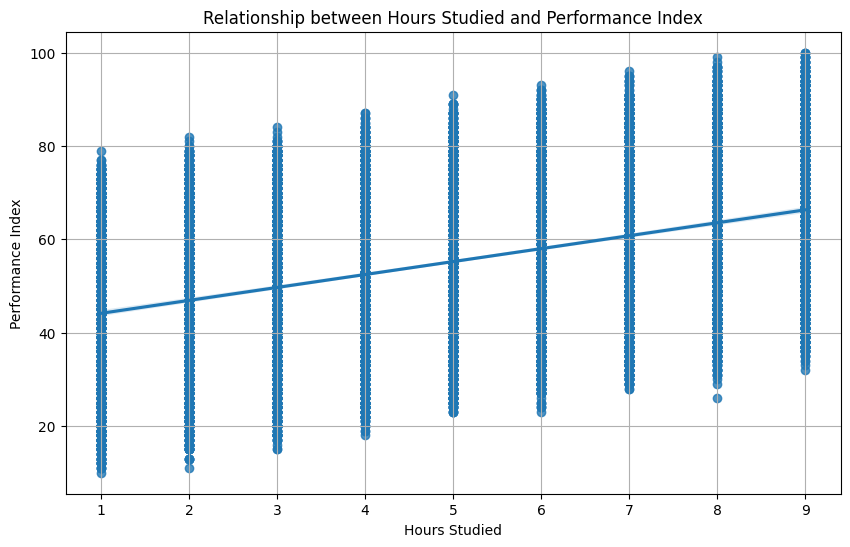

In [ ]:
# Relationship between 'Hours Studied' Vs 'Performance Index'
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours Studied', y='Performance Index', data=df)
plt.title('Relationship between Hours Studied and Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

The regression line illustrates a positive correlation between Hours studied and Performance index.

As the number of hours studied increases, there is a tendency for the performance index to also increase.


In [ ]:
# Group by 'Hours Studied' and calculate mean performance index
grouped_data = df.groupby('Hours Studied')['Performance Index'].mean().reset_index()

print(grouped_data)

   Hours Studied  Performance Index
0              1          44.116319
1              2          46.428571
2              3          49.776586
3              4          52.719816
4              5          55.516453
5              6          58.486320
6              7          60.233835
7              8          64.211397
8              9          65.725561


Students who study for  1 to 4 hours, tend to have lower average performance indices, ranging from 44.12 to 52.72.

Those studying for 8 and 9 hours having the highest average performance indices, at 64.21 and 65.73

The data suggests a positive correlation between hours studied and performance index indicating that dedicating more time to studying is associated with better academic performance on average.

CORRELATION MATRIX

In [ ]:
# Selecting only the numerical columns for correlation calculation
numerical_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Performance Index                      0.373730         0.915189     0.048106   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.043268   

                                  Performance Index  
Hours Studied     

Hours Studied has a moderate positive correlation with Performance Index (0.37)

Previous Scores exhibit a strong positive correlation with Performance Index (0.92)

Sleep Hours show a weak positive correlation with Performance Index (0.05)

Sample Question Papers Practiced have a weak positive correlation with Performance Index (0.04)

Strongest correlation is observed between Previous Scores and Performance Index, indicating that Previous academic performance significantly impacts Current Performance Index.

DECISION TREE MODEL

In [ ]:
# Decision Tree Regression Model Evaluation on Encoded Data
# Check for non-numeric values in the dataset
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# If there are non-numeric values, handle them accordingly (e.g., encode them or remove them)
# For example, if 'Extracurricular Activities' is a non-numeric column, you can encode it using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Extracurricular Activities'])

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor on the encoded data
model_encoded = DecisionTreeRegressor(random_state=42)
model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions on the testing set
y_pred_encoded = model_encoded.predict(X_test_encoded)

# Evaluate the model using Mean Squared Error (MSE)
mse_encoded = mean_squared_error(y_test_encoded, y_pred_encoded)
print("Mean Squared Error (Encoded Data):", mse_encoded)

Non-numeric columns: Index(['Extracurricular Activities'], dtype='object')
Mean Squared Error (Encoded Data): 8.854069444444445


SVM MODEL

In [ ]:
# Define the column transformer to handle categorical variables
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['Extracurricular Activities'])],  # Specify columns to be one-hot encoded
    remainder='passthrough'  # Remainder of the columns will be passed through without any changes
)

# Define the SVM regression model
svm_model = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression

# Create a pipeline to apply the column transformer and train the SVM model
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', svm_model)
])

# Train the SVM regression model
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error (SVM):", mse_svm)


Mean Squared Error (SVM): 5.426751527854362


RANDOM FOREST MODEL

In [ ]:
# Define the column transformer to handle categorical variables
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['Extracurricular Activities'])],  # Specify columns to be one-hot encoded
    remainder='passthrough'  # Remainder of the columns will be passed through without any changes
)

# Define the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Create a pipeline to apply the column transformer and train the Random Forest model
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', rf_model)
])

# Train the Random Forest regression model
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (Random Forest): 5.154956543866363
